## Clustering patients with different Diagnosis code
## Objectives: Identify low medium high diagonised customers and study characteristics of each segment

## Step 1: Pick 2 continuos variables



<img src="k-means-copy.jpg" height="400" width="400"/>

import pandas as pd
import numpy as np

base_dataset=pd.read_csv(r"C:\Users\rp5\Health.csv")

base_dataset.head()

In [54]:
def memory_management(base_dataset):
    """ iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage."""

    df=base_dataset
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print("*******************************************************************************************")
    train_identity=df
    return df

In [55]:
# size reduced for df and named as df1
df1=memory_management(df)

Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.01 MB
Decreased by 0.0%
*******************************************************************************************


In [56]:
df=df[df.describe().columns]
# df['FDZ_NDC_Code'] = base_dataset['FDZ_NDC_Code']
df.head()
master_dataset = df[['Id','ICD9_Procedure_Code','NHS_Number']]
master_dataset.shape
master_dataset=master_dataset.groupby('Id').sum()
master_dataset.reset_index(inplace=True)

In [57]:
def null_values(base_dataset):
    print(base_dataset.isna().sum())
    ## null value percentage     
    null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100
    ## null value percentage beyond threshold drop , else treat the columns 
    
    retained_columns=null_value_table[null_value_table<int(input())].index
    # if any variable as null value greater than input(like 30% of the data) value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>int(input())].index
    base_dataset.drop(drop_columns,axis=1,inplace=True)
    len(base_dataset.isna().sum().index)
    cont=base_dataset.describe().columns
    cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
    print(base_dataset.isna().sum())
    return base_dataset,cat,cont

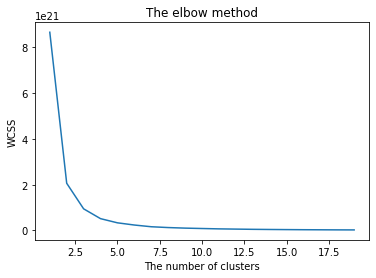

In [62]:
#elbow method : to find out least variance,at a point where it shows constant value
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(master_dataset[[ 'Id','ICD9_Procedure_Code','NHS_Number']])
    x.append(kmeans.inertia_)

plt.plot(range(1,20), x)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
master_dataset=master_dataset.sample(100)

In [73]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(master_dataset)  # dataset that needs to be taken for testing
km.predict(master_dataset) #


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [78]:
from sklearn.cluster import AgglomerativeClustering
km=AgglomerativeClustering(n_clusters=2)
km.fit(master_dataset)
km.labels_
#km.predict(master_dataset)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [85]:
# df2,cat,cont=null_values(df1)
master_dataset['clusters']=km.labels_
master_dataset

,Id,ICD9_Procedure_Code,NHS_Number,clusters
946,947,3894,7660295098,1
904,905,36,789846799,0
547,548,96,6731322024,1
429,430,4944,9924199197,1
731,732,8209,1731194439,0
228,229,6242,8344318580,1
85,86,1032,9998907675,1
606,607,9376,6067322927,1
138,139,8795,7165817840,1
140,141,9377,7449879670,1


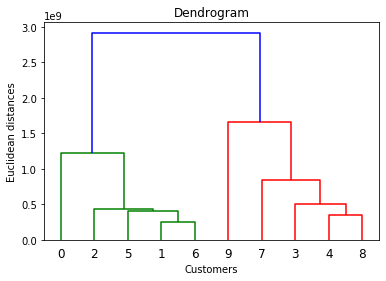

In [84]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df2[0:10], method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()